In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [69]:
dataset = pd.read_csv('weatherReport.csv')
dataset

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [71]:
dataset = dataset.dropna()

In [72]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(dataset["RAIN"])

LabelEncoder()

In [73]:
print(list(label_encoder.classes_))
print()

[False, True]



In [74]:
rain = label_encoder.transform(dataset["RAIN"])
dataset["RAIN"] = rain

C:\Users\student\AppData\Local\Temp/ipykernel_5140/3259223129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["RAIN"] = rain


In [75]:
dataset

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,0
25547,2017-12-11,0.00,49,29,0
25548,2017-12-12,0.00,46,32,0
25549,2017-12-13,0.00,48,34,0


In [76]:
X=dataset.iloc[:, [1,4]].values
y=dataset.iloc[:,4].values

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [85]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [86]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [87]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [88]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[3669,    0],
       [   0, 2718]], dtype=int64)

In [89]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


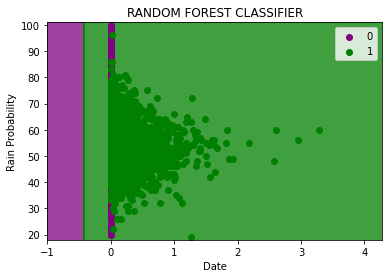

In [94]:
from matplotlib.colors import ListedColormap
X_set,y_set=x_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('PURPLE','GREEN')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('purple','green'))(i),label=j)
plt.title('RANDOM FOREST CLASSIFIER')
plt.xlabel('Date')
plt.ylabel('Rain Probability')
plt.legend()
plt.show()

In [95]:
x_test

array([[3.2e-01, 5.8e+01, 4.5e+01],
       [1.0e-02, 4.5e+01, 3.1e+01],
       [0.0e+00, 4.4e+01, 2.9e+01],
       ...,
       [5.0e-02, 4.3e+01, 3.5e+01],
       [0.0e+00, 3.7e+01, 2.8e+01],
       [3.3e-01, 5.1e+01, 4.0e+01]])

In [93]:
X_test

array([[ 0.87777559,  1.15838161],
       [-0.40003342,  1.15838161],
       [-0.44125307, -0.86327337],
       ...,
       [-0.23515484,  1.15838161],
       [-0.44125307, -0.86327337],
       [ 0.91899524,  1.15838161]])